### 1. For PTEN


#### Import all the necessary packages


In [256]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

%matplotlib inline

import warnings
# filter warnings
warnings.filterwarnings('ignore')


In [257]:
X = pd.read_csv('trainReadyData/PTENX.csv')
X


,AKT1|207,BAD|572,BECN1|8678,CA9|768,CCND1|595,CDKN1B|1027,FTH1|2495,HIF1A|3091,IL6|3569,KLK3|354,MAP1LC3B|81631,MT2A|4502,MTOR|2475,PTGS2|5743,SLC2A1|6513,SLC30A1|7779,VEGFA|7422
0,11.671783,10.331095,10.330399,8.786293,11.123063,10.840378,15.024419,12.438820,3.467749,0.000000,11.760332,12.561393,10.611280,6.797676,11.905623,8.659774,12.723702
1,11.361381,10.131210,10.266701,11.680693,10.709868,9.026173,16.389493,13.119283,11.171136,0.000000,12.123821,15.306795,10.072728,10.378798,12.638665,8.692564,13.159528
2,12.262058,10.344795,10.195539,8.973686,11.079129,11.572258,15.032451,12.340602,6.207085,-0.244172,11.957079,11.650502,10.048771,7.186326,11.345759,7.359500,11.828677
3,11.995195,10.219912,10.333986,5.625884,11.137253,11.410401,14.232891,13.120130,6.027643,0.000000,11.471675,12.230678,10.717105,6.842500,11.735757,7.664320,11.604906
4,11.774395,11.011662,10.600298,10.208368,11.100662,10.846159,16.334449,12.128655,7.144285,0.000000,11.626989,13.323079,9.705211,7.297532,11.567655,8.639451,13.999798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,12.001832,10.449952,10.350913,7.023437,10.750616,10.626369,14.830816,11.978475,6.093245,0.000000,11.688075,12.098653,10.413475,5.969256,11.221073,7.700662,12.583022
137,11.891185,10.296958,10.565382,8.936019,9.494196,10.247973,14.773544,12.318858,5.642592,0.000000,11.652444,15.672665,10.246413,6.667682,12.738220,6.716592,12.943887
138,11.200209,10.683629,10.477150,8.178603,10.765598,11.322884,14.255659,10.943869,2.859671,0.000000,11.886304,12.760193,10.710462,5.817447,11.623525,8.041878,13.264488
139,12.258220,10.581927,10.184426,8.162077,11.163443,10.560895,14.469103,12.152434,2.819423,0.000000,11.358587,12.772848,10.804321,7.920966,11.505461,7.729521,13.638809


In [258]:
# Check if there is any missing values
X.isnull().sum()


AKT1|207          0
BAD|572           0
BECN1|8678        0
CA9|768           0
CCND1|595         0
CDKN1B|1027       0
FTH1|2495         0
HIF1A|3091        0
IL6|3569          0
KLK3|354          0
MAP1LC3B|81631    0
MT2A|4502         0
MTOR|2475         0
PTGS2|5743        0
SLC2A1|6513       0
SLC30A1|7779      0
VEGFA|7422        0
dtype: int64

In [259]:
y = pd.read_csv('trainReadyData/PTENy.csv')
y


,Class
0,0
1,1
2,0
3,0
4,0
...,...
136,1
137,0
138,0
139,1


In [260]:
y.value_counts()


Class
0        97
1        44
dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

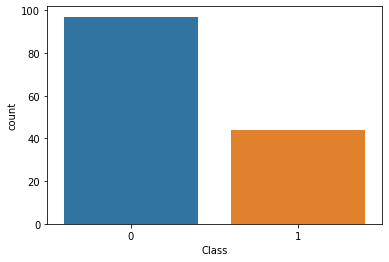

In [261]:
sns.countplot(y['Class'])


##### Creating three set of datas 1. Training Set 2. Validataion Set and 3. Testing Set

In [262]:
# Splitting Datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.87, random_state=1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.9, random_state=1)


In [263]:
print("X Training Set     " + str(X_train.shape))
print("X Testing Set      " + str(X_test.shape))
print("X Validation Set   " + str(X_valid.shape))
print("y Training Set     " + str(y_train.shape))
print("y Testing Set      " + str(y_test.shape))
print("y Validation Set   " + str(y_valid.shape))

X Training Set     (109, 17)
X Testing Set      (19, 17)
X Validation Set   (13, 17)
y Training Set     (109, 1)
y Testing Set      (19, 1)
y Validation Set   (13, 1)


In [264]:
# Applying standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_valid = sc.transform(X_valid)

# Logistic Regression


In [265]:
logReg = LogisticRegression()

In [266]:
logReg.fit(X_train, y_train)
y_pred = logReg.predict(X_test)

In [267]:
# Lets see how well our model performs
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Print Accuracy
print(accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.73      0.79      0.76        14
           1       0.25      0.20      0.22         5

    accuracy                           0.63        19
   macro avg       0.49      0.49      0.49        19
weighted avg       0.61      0.63      0.62        19

[[11  3]
 [ 4  1]]
0.631578947368421


### AUC Curve


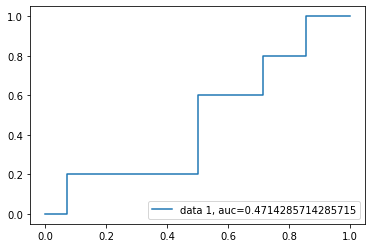

In [268]:
y_pred_proba = logReg.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### ROC Curve


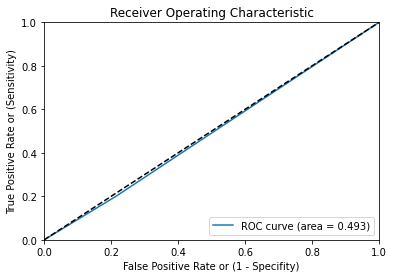

In [269]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")


### Learning Curve


In [283]:
train_sizes, train_scores, validation_scores = learning_curve(
    logReg, X_train, y_train, train_sizes=np.logspace(-1, 0, 20))

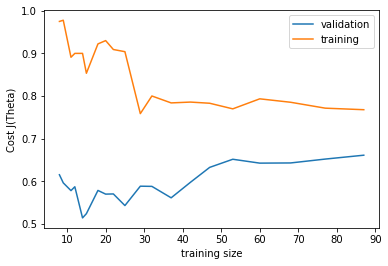

In [284]:
plt.plot(train_sizes, validation_scores.mean(axis=1), label='validation') 
plt.plot(train_sizes, train_scores.mean(axis=1), label='training')
plt.xlabel('training size')
plt.ylabel('Cost J(Theta)')
plt.legend()
plt.show()

### Tuning Parameters

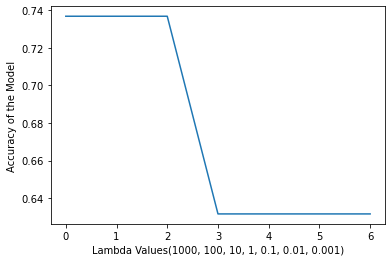

In [271]:
C_param_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

AccuracyTable = []

for i in C_param_range:
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = i, random_state = 1)
    lr.fit(X_train,y_train)
    
    # Predict using model
    y_pred = lr.predict(X_test)
    
    # Saving accuracy score in table
    AccuracyTable.append(accuracy_score(y_test, y_pred))


plt.xlabel("Lambda Values(1000, 100, 10, 1, 0.1, 0.01, 0.001)")
plt.ylabel("Accuracy of the Model")
plt.plot(np.array(AccuracyTable))
plt.show()

# Random Forest Classifier


In [272]:
rfc = RandomForestClassifier(n_estimators=85)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [273]:
# Lets see how well our model performs
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

# Print Accuracy
print(accuracy_score(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80        14
           1       0.33      0.20      0.25         5

    accuracy                           0.68        19
   macro avg       0.54      0.53      0.52        19
weighted avg       0.64      0.68      0.66        19

[[12  2]
 [ 4  1]]
0.6842105263157895


### ROC Curve

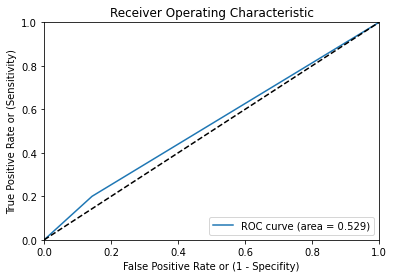

In [274]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, pred_rfc)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

### Learning Curve

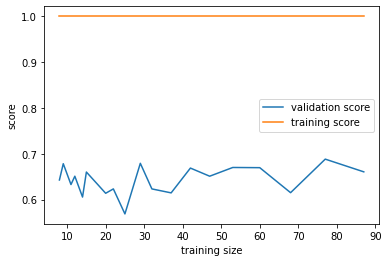

In [275]:
train_sizes, train_scores, validation_scores = learning_curve(rfc, X_train, y_train, train_sizes=np.logspace(-1, 0, 20))

plt.plot(train_sizes, validation_scores.mean(axis=1), label='validation score') 
plt.plot(train_sizes, train_scores.mean(axis=1), label='training score') 
plt.xlabel('training size')
plt.ylabel('score')
plt.legend()
plt.show()

# SVM Classifier


In [276]:
clf = svm.SVC()

clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)


In [277]:
# Lets see how well our model performs
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))


              precision    recall  f1-score   support

           0       0.74      1.00      0.85        14
           1       0.00      0.00      0.00         5

    accuracy                           0.74        19
   macro avg       0.37      0.50      0.42        19
weighted avg       0.54      0.74      0.63        19

[[14  0]
 [ 5  0]]


### Learning Curve

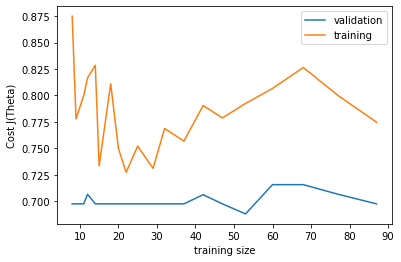

In [278]:
train_sizes, train_scores, validation_scores = learning_curve(clf, X_train, y_train, train_sizes=np.logspace(-1, 0, 20))

plt.plot(train_sizes, validation_scores.mean(axis=1), label='validation') 
plt.plot(train_sizes, train_scores.mean(axis=1), label='training') 
plt.xlabel('training size')
plt.ylabel('Cost J(Theta)')
plt.legend()
plt.show()


In [279]:
print(accuracy_score(y_test, pred_clf))

0.7368421052631579


# Neural Network


In [280]:
mlpc = MLPClassifier(hidden_layer_sizes=(30, 10), max_iter=500)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

In [281]:
# Lets see how well our model performs
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.69      0.79      0.73        14
           1       0.00      0.00      0.00         5

    accuracy                           0.58        19
   macro avg       0.34      0.39      0.37        19
weighted avg       0.51      0.58      0.54        19

[[11  3]
 [ 5  0]]


In [282]:
print(accuracy_score(y_test, pred_mlpc))

0.5789473684210527
